In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="RRFLC1UZ419Fx3VDR5Lv")
project = rf.workspace("visuallingo").project("sign-language-detection-g2sod")
dataset = project.version(3).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to Sign-Language-Detection-3 in yolov8:: 100%|██████████| 5476/5476 [00:01<00:00, 5444.48it/s]


In [ ]:
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

100% 21.5M/21.5M [00:00<00:00, 42.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=224, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

FileNotFoundError: ignored

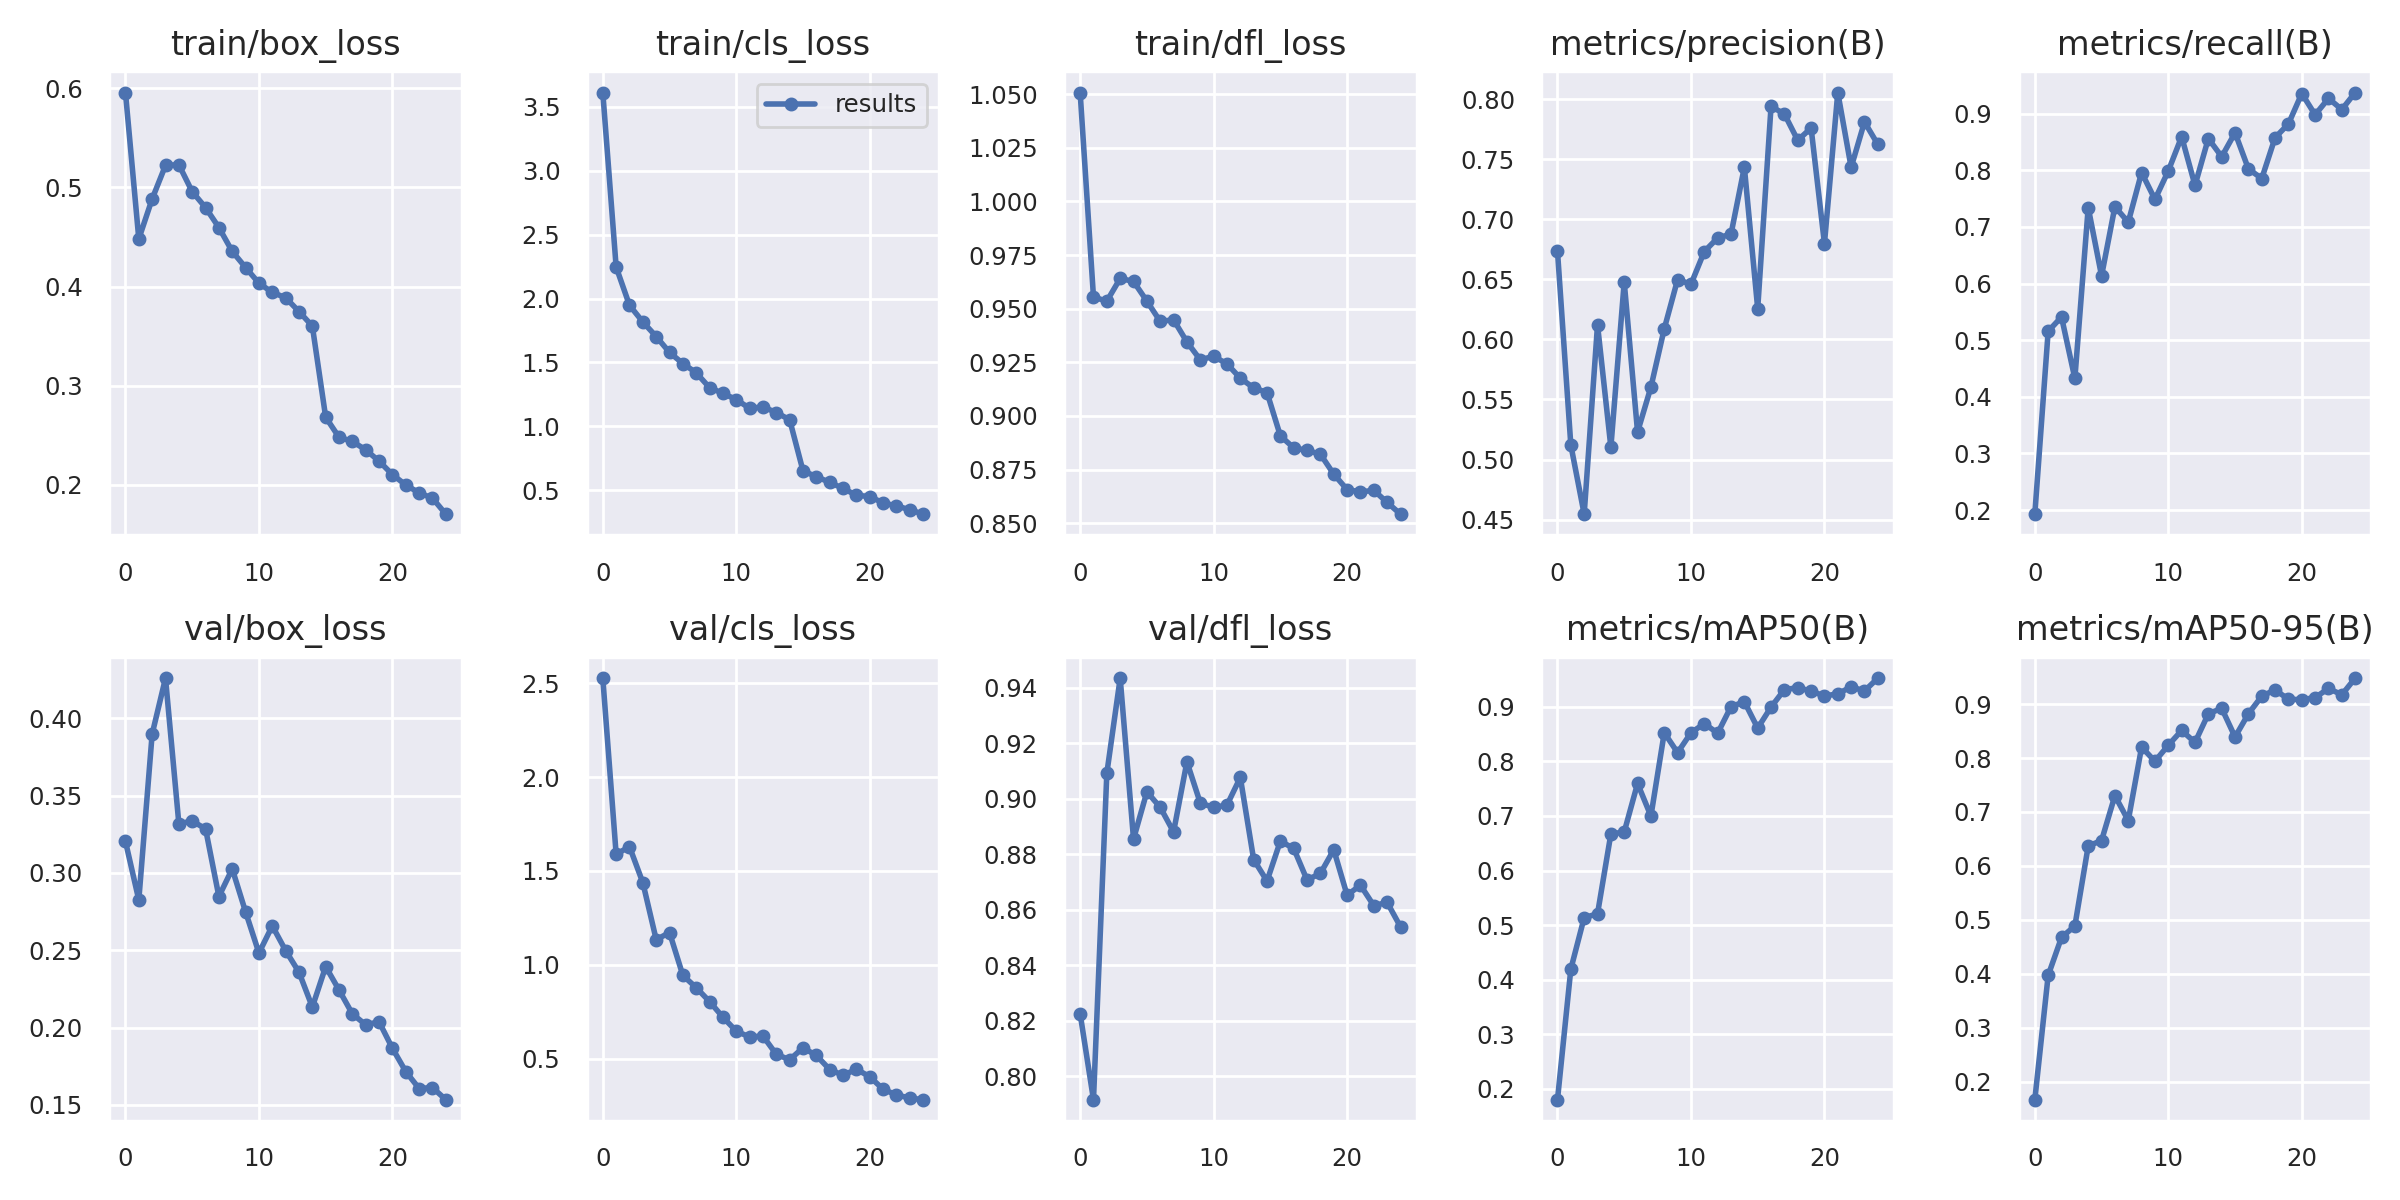

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

2023-09-05 04:21:18.536803: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 04:21:19.511269: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11149191 parameters, 0 gradients, 28.6 GFLOPs
val: Scanning /content/Sign-Language-Detection-3/valid/labels.cache... 252 images, 5 backgrounds, 0 corrupt: 100% 252/252 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:05<00:00,  3.15it/s]
                   all        252        249      0.763      0.937      0.952      0.948
                     0        252         

In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.25 source=/content/Sign-Language-Detection-3/test/images save=True

2023-09-05 04:31:14.020496: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-05 04:31:14.982173: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11149191 parameters, 0 gradients, 28.6 GFLOPs
image 1/126 /content/Sign-Language-Detection-3/test/images/And-13_png.rf.15e5721677c93a9083a3d51b7750bbf0.jpg: 224x224 1 And, 7.4ms
image 2/126 /content/Sign-Language-Detection-3/test/images/April-08_png.rf.67a590acb43468e5a0e344588696c89a.jpg: 224x224 1 April, 1 August, 1 September, 7.4ms
image 3/126 /content/Sign-Language-Detection-3/test/images/August-011_png.rf.16d369822cf467c6991d4d5dcc9d

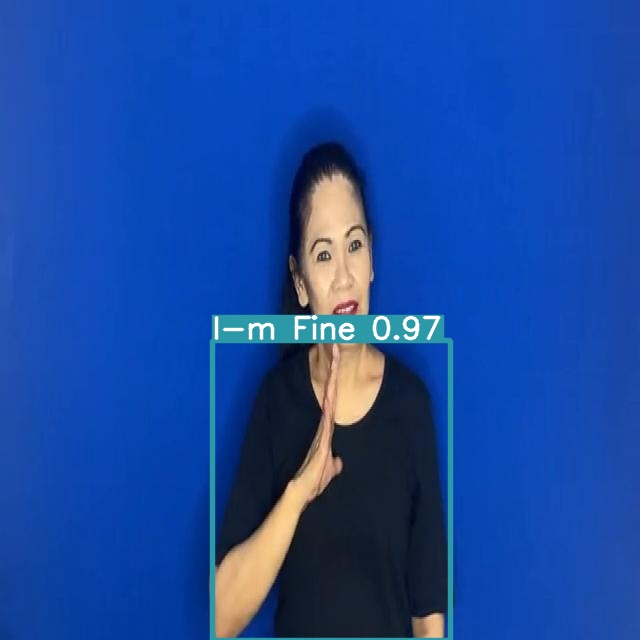

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/I-m-Fine-030_png.rf.1cae5ff2bff1d20fa08c6be1f02f3141.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")
